In [1]:
from utils.initialization import *
from utils.arima_utils import *
from utils import pipe_def_arima
from utils.data_utils import *
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from tqdm import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
fognet = os.getcwd()
conf = build_conf(fognet)

/Users/thorey/Documents/project/competition/fognet/models/bbking/arima
Conf file put in /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_5


In [4]:
data = load_raw_data()

# What we already test that do not seem to work 

- Predict the yield nan values based on ARIM.auto before running the model !
- Same thing for the feature space ! But we should do it directly on the group !


## Base Best model - 0.846

In [5]:
config = parse_conf_file('/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/conf_model.json')
model = ArimaModel(config,AR=1,MA=5,D=0,pipe=getattr(pipe_def_arima,'pipe0'),
                  pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'))
model.train()

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 4078 observation
Le test is composed by 1 group and 4078 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000


## First test 

In [114]:
dftotal = build_dataset()
NumSelector = NumericFeatureSelector()
dftotal = NumSelector.fit_transform(dftotal)

In [7]:
dftotal.columns

Index([u'gusts_ms', u'humidity', u'leafwet450_min', u'leafwet460_min',
       u'leafwet_lwscnt', u'percip_mm', u'temp', u'wind_dir', u'wind_ms',
       u'yield', u'guel_T', u'guel_P0', u'guel_P', u'guel_U', u'guel_Ff',
       u'guel_ff10', u'guel_Td', u'sidi_T', u'sidi_Po', u'sidi_P', u'sidi_Pa',
       u'sidi_U', u'sidi_Ff', u'sidi_Tn', u'sidi_Tx', u'sidi_VV', u'sidi_Td',
       u'sidi_tR', u'sidi_Tg', u'sidi_sss', u'aga_T', u'aga_P0', u'aga_P',
       u'aga_U', u'aga_Ff', u'aga_ff10', u'aga_Td'],
      dtype='object')

In [11]:
from utils.pipe_def_arima import pipe_list_micro,Pipe
pipe= Pipe()

In [12]:
score = []
for i,name in tqdm(enumerate(dftotal.columns),total=len(dftotal.columns)):
    ############################
    # pipe_list_brick
    pipe_list= pipe_list_micro
    kwargs_list = {'FeatureSelector__features': [name]}
    pipe_list = {'micro': pipe_list}
    pipe_kwargs = {'micro': kwargs_list}
    pipe_first_test = pipe(pipe_list, pipe_kwargs)
    
    mod = ArimaModel(config,AR=1,MA=5,D=0,pipe=pipe_first_test,
                  pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'))
    mod.train()
    score.append((name,mod.train_rmse,mod.test_rmse))
    
    

  0%|          | 0/37 [00:00<?, ?it/s]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.033
    aic : 6319.519
    bic : 6362.858
    hqic : 6335.553
test summary:
    rmse : 0.998
    aic : 1713.186
    bic : 1747.739
    hqic : 1726.645
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

  3%|▎         | 1/37 [00:10<06:33, 10.92s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.045
    aic : 6331.648
    bic : 6374.987
    hqic : 6347.681
test summary:
    rmse : 0.981
    aic : 1707.808
    bic : 1742.362
    hqic : 1721.267
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

  5%|▌         | 2/37 [00:22<06:26, 11.05s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.937
    aic : 6204.686
    bic : 6248.025
    hqic : 6220.720
test summary:
    rmse : 0.892
    aic : 1654.996
    bic : 1689.549
    hqic : 1668.455
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

  8%|▊         | 3/37 [00:33<06:15, 11.06s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.958
    aic : 6168.475
    bic : 6211.813
    hqic : 6184.508
test summary:
    rmse : 0.934
    aic : 1645.333
    bic : 1679.886
    hqic : 1658.792
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 11%|█         | 4/37 [00:44<06:07, 11.14s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.808
    aic : 6057.828
    bic : 6101.167
    hqic : 6073.861
test summary:
    rmse : 0.925
    aic : 1658.797
    bic : 1693.351
    hqic : 1672.257
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 14%|█▎        | 5/37 [00:55<05:49, 10.92s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.058
    aic : 6347.718
    bic : 6391.057
    hqic : 6363.751
test summary:
    rmse : 1.243
    aic : 1769.114
    bic : 1803.667
    hqic : 1782.573
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 16%|█▌        | 6/37 [01:07<05:50, 11.30s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.071
    aic : 6357.181
    bic : 6400.520
    hqic : 6373.215
test summary:
    rmse : 0.981
    aic : 1715.027
    bic : 1749.580
    hqic : 1728.486
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 19%|█▉        | 7/37 [01:23<06:19, 12.64s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.075
    aic : 6357.567
    bic : 6400.906
    hqic : 6373.601
test summary:
    rmse : 1.000
    aic : 1722.059
    bic : 1756.613
    hqic : 1735.518
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 22%|██▏       | 8/37 [01:37<06:20, 13.11s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.028
    aic : 6313.480
    bic : 6356.819
    hqic : 6329.514
test summary:
    rmse : 1.003
    aic : 1713.932
    bic : 1748.485
    hqic : 1727.391
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 24%|██▍       | 9/37 [01:47<05:44, 12.31s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 0.015
    aic : -20841.366
    bic : -20798.027
    hqic : -20825.332
test summary:
    rmse : 0.000
    aic : -5663.319
    bic : -5628.765
    hqic : -5649.859
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160413_154404.csv


 27%|██▋       | 10/37 [02:09<06:48, 15.12s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.078
    aic : 6364.046
    bic : 6407.385
    hqic : 6380.080
test summary:
    rmse : 0.995
    aic : 1717.876
    bic : 1752.429
    hqic : 1731.335
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 30%|██▉       | 11/37 [02:20<05:58, 13.80s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6367.477
    bic : 6410.816
    hqic : 6383.510
test summary:
    rmse : 0.999
    aic : 1719.018
    bic : 1753.571
    hqic : 1732.477
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 32%|███▏      | 12/37 [02:31<05:26, 13.08s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.085
    aic : 6369.508
    bic : 6412.846
    hqic : 6385.541
test summary:
    rmse : 0.996
    aic : 1718.912
    bic : 1753.465
    hqic : 1732.371
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 35%|███▌      | 13/37 [02:43<05:06, 12.78s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.070
    aic : 6357.294
    bic : 6400.632
    hqic : 6373.327
test summary:
    rmse : 0.994
    aic : 1717.474
    bic : 1752.027
    hqic : 1730.933
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 38%|███▊      | 14/37 [02:55<04:51, 12.66s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.085
    aic : 6370.426
    bic : 6413.764
    hqic : 6386.459
test summary:
    rmse : 0.989
    aic : 1718.368
    bic : 1752.921
    hqic : 1731.827
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 41%|████      | 15/37 [03:06<04:27, 12.17s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6369.546
    bic : 6412.885
    hqic : 6385.580
test summary:
    rmse : 1.009
    aic : 1718.521
    bic : 1753.075
    hqic : 1731.980
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 43%|████▎     | 16/37 [03:17<04:05, 11.71s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.081
    aic : 6366.992
    bic : 6410.331
    hqic : 6383.025
test summary:
    rmse : 0.994
    aic : 1719.100
    bic : 1753.654
    hqic : 1732.560
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 46%|████▌     | 17/37 [03:28<03:48, 11.45s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.083
    aic : 6368.155
    bic : 6411.493
    hqic : 6384.188
test summary:
    rmse : 0.993
    aic : 1718.622
    bic : 1753.175
    hqic : 1732.081
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 49%|████▊     | 18/37 [03:39<03:32, 11.19s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6367.652
    bic : 6410.991
    hqic : 6383.686
test summary:
    rmse : 1.001
    aic : 1718.868
    bic : 1753.421
    hqic : 1732.327
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 51%|█████▏    | 19/37 [03:50<03:20, 11.12s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6367.717
    bic : 6411.056
    hqic : 6383.750
test summary:
    rmse : 1.002
    aic : 1718.929
    bic : 1753.483
    hqic : 1732.388
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 54%|█████▍    | 20/37 [04:01<03:09, 11.16s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.085
    aic : 6370.216
    bic : 6413.555
    hqic : 6386.250
test summary:
    rmse : 0.996
    aic : 1718.383
    bic : 1752.936
    hqic : 1731.842
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 57%|█████▋    | 21/37 [04:11<02:53, 10.85s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.080
    aic : 6365.643
    bic : 6408.981
    hqic : 6381.676
test summary:
    rmse : 1.001
    aic : 1719.407
    bic : 1753.960
    hqic : 1732.866
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 59%|█████▉    | 22/37 [04:22<02:42, 10.80s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.083
    aic : 6367.872
    bic : 6411.211
    hqic : 6383.906
test summary:
    rmse : 1.012
    aic : 1718.395
    bic : 1752.949
    hqic : 1731.854
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 62%|██████▏   | 23/37 [04:32<02:28, 10.63s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6368.643
    bic : 6411.981
    hqic : 6384.676
test summary:
    rmse : 1.007
    aic : 1718.444
    bic : 1752.997
    hqic : 1731.903
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 65%|██████▍   | 24/37 [04:43<02:19, 10.77s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.082
    aic : 6368.641
    bic : 6411.979
    hqic : 6384.674
test summary:
    rmse : 0.988
    aic : 1718.140
    bic : 1752.694
    hqic : 1731.600
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 68%|██████▊   | 25/37 [04:54<02:09, 10.77s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.086
    aic : 6370.278
    bic : 6413.616
    hqic : 6386.311
test summary:
    rmse : 1.003
    aic : 1718.846
    bic : 1753.400
    hqic : 1732.306
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 70%|███████   | 26/37 [05:05<01:58, 10.81s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6368.205
    bic : 6411.544
    hqic : 6384.239
test summary:
    rmse : 1.024
    aic : 1721.040
    bic : 1755.593
    hqic : 1734.499
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 73%|███████▎  | 27/37 [05:15<01:48, 10.84s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.079
    aic : 6363.770
    bic : 6407.108
    hqic : 6379.803
test summary:
    rmse : 0.998
    aic : 1716.613
    bic : 1751.167
    hqic : 1730.072
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 76%|███████▌  | 28/37 [05:25<01:35, 10.59s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6369.549
    bic : 6412.888
    hqic : 6385.582
test summary:
    rmse : 1.006
    aic : 1718.801
    bic : 1753.355
    hqic : 1732.260
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 78%|███████▊  | 29/37 [05:37<01:26, 10.76s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.086
    aic : 6370.761
    bic : 6414.100
    hqic : 6386.795
test summary:
    rmse : 0.989
    aic : 1718.450
    bic : 1753.004
    hqic : 1731.910
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 81%|████████  | 30/37 [05:47<01:13, 10.55s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.079
    aic : 6363.948
    bic : 6407.287
    hqic : 6379.981
test summary:
    rmse : 0.999
    aic : 1717.686
    bic : 1752.240
    hqic : 1731.146
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 84%|████████▍ | 31/37 [05:58<01:04, 10.68s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6368.347
    bic : 6411.686
    hqic : 6384.381
test summary:
    rmse : 0.992
    aic : 1718.439
    bic : 1752.993
    hqic : 1731.898
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 86%|████████▋ | 32/37 [06:09<00:54, 10.96s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.085
    aic : 6368.964
    bic : 6412.303
    hqic : 6384.997
test summary:
    rmse : 0.992
    aic : 1718.516
    bic : 1753.069
    hqic : 1731.975
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 89%|████████▉ | 33/37 [06:20<00:43, 10.82s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.076
    aic : 6360.695
    bic : 6404.034
    hqic : 6376.728
test summary:
    rmse : 1.006
    aic : 1717.671
    bic : 1752.224
    hqic : 1731.130
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 92%|█████████▏| 34/37 [06:31<00:32, 10.79s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.082
    aic : 6366.687
    bic : 6410.026
    hqic : 6382.720
test summary:
    rmse : 1.008
    aic : 1718.032
    bic : 1752.585
    hqic : 1731.491
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 95%|█████████▍| 35/37 [06:41<00:21, 10.69s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6369.797
    bic : 6413.136
    hqic : 6385.830
test summary:
    rmse : 0.998
    aic : 1718.944
    bic : 1753.498
    hqic : 1732.404
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

 97%|█████████▋| 36/37 [06:52<00:10, 10.72s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.084
    aic : 6367.906
    bic : 6411.244
    hqic : 6383.939
test summary:
    rmse : 1.013
    aic : 1719.254
    bic : 1753.808
    hqic : 1732.713
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/mode

In [35]:
np.array(score)[:,1:].astype('float')

array([[  2.03266832e+00,   9.97651178e-01],
       [  2.04494424e+00,   9.80778113e-01],
       [  1.93737618e+00,   8.92026658e-01],
       [  1.95814861e+00,   9.34256871e-01],
       [  1.80762266e+00,   9.24730138e-01],
       [  2.05789104e+00,   1.24344094e+00],
       [  2.07088730e+00,   9.80934485e-01],
       [  2.07512610e+00,   1.00025194e+00],
       [  2.02834454e+00,   1.00318651e+00],
       [  1.53154832e-02,   1.34328387e-04],
       [  2.07835850e+00,   9.94631768e-01],
       [  2.08352504e+00,   9.98756061e-01],
       [  2.08492313e+00,   9.95794572e-01],
       [  2.06986986e+00,   9.93688791e-01],
       [  2.08504834e+00,   9.88946600e-01],
       [  2.08435225e+00,   1.00922501e+00],
       [  2.08103923e+00,   9.94277367e-01],
       [  2.08250504e+00,   9.93159121e-01],
       [  2.08354984e+00,   1.00149221e+00],
       [  2.08360063e+00,   1.00176821e+00],
       [  2.08482930e+00,   9.95759192e-01],
       [  2.08004367e+00,   1.00136194e+00],
       [  

In [44]:
results = pd.DataFrame(np.array(score)[:,1:].astype('float'),columns = ['train_rmse','test_rmse'],index =np.array(score)[:,0])
results.sort_values('test_rmse',inplace=True)
results[results.test_rmse<1].index

Index([u'yield', u'leafwet450_min', u'leafwet_lwscnt', u'leafwet460_min',
       u'humidity', u'temp', u'sidi_Tx', u'guel_Ff', u'sidi_sss', u'aga_P',
       u'aga_P0', u'sidi_T', u'guel_U', u'guel_Td', u'guel_T', u'sidi_Pa',
       u'guel_P', u'gusts_ms', u'sidi_tR', u'aga_ff10', u'guel_P0', u'aga_T'],
      dtype='object')

In [55]:
results

,train_rmse,test_rmse
yield,0.015315,0.000134
leafwet450_min,1.937376,0.892027
leafwet_lwscnt,1.807623,0.924730
leafwet460_min,1.958149,0.934257
humidity,2.044944,0.980778
temp,2.070887,0.980934
sidi_Tx,2.082293,0.988161
guel_Ff,2.085048,0.988947
sidi_sss,2.085820,0.989127
aga_P,2.084516,0.991829


In [59]:
pipe_list= pipe_list_micro
columns = list(results[results.test_rmse<0.995].index)
columns.remove('yield')
kwargs_list = {'FeatureSelector__features': columns}
pipe_list = {'micro': pipe_list}
pipe_kwargs = {'micro': kwargs_list}
pipe_first_test = pipe(pipe_list, pipe_kwargs)
    
mod = ArimaModel(config,AR=1,MA=5,D=0,pipe=pipe_first_test,
                  pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'))
mod.train()

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.685
    aic : 5948.469
    bic : 6181.414
    hqic : 6034.648
test summary:
    rmse : 0.891
    aic : 1700.679
    bic : 1886.404
    hqic : 1773.023
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160413_161326.csv


## OLS

In [212]:
final_result = []
for i in range(1,len(results)):
    formula = 'feat_yield ~ '+ '+'.join([f for f in results.head(i).index])
    ols = smf.ols(formula,data=train)
    result = ols.fit()
    final_result.append((i,result.rsquared))

In [213]:
final_result

[(1, 0.53106499399020379),
 (2, 0.53531848598910625),
 (3, 0.53742974039837055),
 (4, 0.53744851139893712),
 (5, 0.55159204959670294),
 (6, 0.55667899251575315),
 (7, 0.56249267889090082),
 (8, 0.56313779339224446),
 (9, 0.56355841693647857),
 (10, 0.56603397054847104),
 (11, 0.57421870568139466),
 (12, 0.57422033523879912),
 (13, 0.57484127604103141),
 (14, 0.57514236316313516),
 (15, 0.57515666863513326),
 (16, 0.57528880382480752),
 (17, 0.57542655562563372),
 (18, 0.57544681473098747),
 (19, 0.57751228357480622),
 (20, 0.5775147017170601),
 (21, 0.57753550101203444),
 (22, 0.57762277751924551),
 (23, 0.57773135377814211),
 (24, 0.57819015771261273),
 (25, 0.5788329569196089),
 (26, 0.57883296348483948),
 (27, 0.57886229996122418),
 (28, 0.58033468334807059),
 (29, 0.58189327821786652),
 (30, 0.58331585797202734),
 (31, 0.58387115251280397),
 (32, 0.58422569885153619),
 (33, 0.58572194899506003),
 (34, 0.58698372276854671),
 (35, 0.58729747120500098)]

In [164]:
results

,train_rmse,test_rmse
yield,0.015315,0.000134
leafwet450_min,1.937376,0.892027
leafwet_lwscnt,1.807623,0.924730
leafwet460_min,1.958149,0.934257
humidity,2.044944,0.980778
temp,2.070887,0.980934
sidi_Tx,2.082293,0.988161
guel_Ff,2.085048,0.988947
sidi_sss,2.085820,0.989127
aga_P,2.084516,0.991829


## Autorima by group

In [253]:
columns = results[results.test_rmse<1.0].drop('yield',axis=0).index
columns

Index([u'leafwet450_min', u'leafwet_lwscnt', u'leafwet460_min', u'humidity',
       u'temp', u'sidi_Tx', u'guel_Ff', u'sidi_sss', u'aga_P', u'aga_P0',
       u'sidi_T', u'guel_U', u'guel_Td', u'guel_T', u'sidi_Pa', u'guel_P',
       u'gusts_ms', u'sidi_tR', u'aga_ff10', u'guel_P0', u'aga_T'],
      dtype='object')

In [268]:
from utils.arima_utils import *

In [379]:
class CreateLagArrays(TransformerMixin, BaseEstimator):
    ''' Create lag arrays -
    params: 
    lags - number of lag vector to incorporate for each feature
    if lags =3, then 0,1,2 lags  !'''
    def __init__(self, lags=3,pad_values= 0):
        self.lags = lags
        self.pad_values = pad_values

    def transform(self, X):
        X = np.array(X)
        if len(X.shape) == 1:
            X = X[:,np.newaxis]
        nb_dim = X.shape[1]
        print nb_dim
        transform_array = []
        for i in range(nb_dim):
            transform_array.append(self.return_lags_for_one_vector(X[:,i]))
        return reduce(lambda x,y:np.vstack((x,y)),transform_array).T

    def return_lags_for_one_vector(self,x):
        ''' Get one dimensional vector and return 
        an array of lag vectors '''
        
        assert len(x.shape) == 1
        lag_vectors = []
        dim = x.shape[0]
        for n in range(self.lags):
            lag_vectors.append(np.pad(x,pad_width=(n,0), mode='constant', constant_values=self.pad_values)[:dim])
        return reduce(lambda x,y:np.vstack((x,y)),lag_vectors)
        
    def fit(self, X, y=None):
        return self

In [386]:
a = CreateLagArrays()

In [390]:
b = a.transform(dftotal[['humidity','temp','wind_ms']])

3


In [321]:
a = np.array(X)[:,0]

In [166]:
df.interpolate?

In [181]:
model.df.humidity

2013-11-23 16:00:00         NaN
2013-11-23 18:00:00         NaN
2013-11-23 20:00:00         NaN
2013-11-23 22:00:00         NaN
2013-11-24 00:00:00         NaN
2013-11-24 02:00:00         NaN
2013-11-24 04:00:00         NaN
2013-11-24 06:00:00         NaN
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00         NaN
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00         NaN
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00         NaN
2013-11-24 20:00:00         NaN
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00         NaN
2013-11-25 04:00:00         NaN
2013-11-25 06:00:00         NaN
2013-11-25 08:00:00         NaN
2013-11-25 10:00:00         NaN
2013-11-25 12:00:00         NaN
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00         NaN
2013-11-25 18:00:00         NaN
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00         NaN
2013-11-26 00:00:00         NaN
2013-11-26 02:00:00         NaN
                         ...   
2016-01-

In [206]:
ewma = pd.ewma(model.df[['temp','humidity']], span=24)

In [208]:
model.df[['temp','humidity']].fillna(ewma)

,temp,humidity
2013-11-23 16:00:00,NaN,NaN
2013-11-23 18:00:00,NaN,NaN
2013-11-23 20:00:00,NaN,NaN
2013-11-23 22:00:00,NaN,NaN
2013-11-24 00:00:00,NaN,NaN
2013-11-24 02:00:00,NaN,NaN
2013-11-24 04:00:00,NaN,NaN
2013-11-24 06:00:00,NaN,NaN
2013-11-24 08:00:00,NaN,NaN
2013-11-24 10:00:00,NaN,NaN


In [195]:
model.df.temp.fillna(ewma, inplace=True)

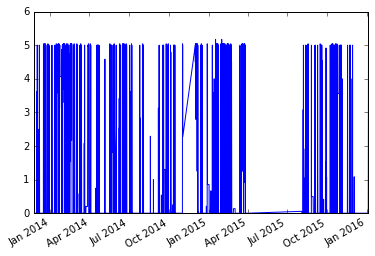

In [196]:
model.df.temp.plot()

In [638]:
from utils.arima_utils import *

In [82]:
from utils.pipe_def_arima import *
from utils.arima_utils import *

In [133]:
results.head()

,train_rmse,test_rmse
leafwet450_min,1.996739,2.557298
leafwet_lwscnt,1.940597,2.575113
leafwet460_min,2.057505,2.748844
humidity,2.150822,2.876913
temp,2.187553,2.995970


In [241]:
len(results)

36

In [242]:
############################
# pipe_maia improved
pipe_list1 = ['FeatureSelector',
              'EWMAMissingValueInputer',
              'CreateLagArrays',
              'FillRemainingNaN',
              'MyStandardScaler']
pipe_list1 = pipe_list1
kwargs_list1 = {'FeatureSelector__features': list(results.index),
               'CreateLagArrays__lags':6*12,
               'CreateLagArrays__inter_lags':12}
kwargs_list2 = {'FeatureSelector__features': list(results.index),
               'CreateLagArrays__lags':6,
               'CreateLagArrays__inter_lags':1}

pipe_list = {'part1': pipe_list1,'part2':pipe_list1}
pipe_kwargs = {'part1': kwargs_list1,'part2':kwargs_list2}
pipe_maia_V3 = pipe(pipe_list, pipe_kwargs)

model = ArimaModel(config,AR=2,MA=5,D=0,pipe=pipe_maia_V3,
                  pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'),
                  pca_components = 0)
model.train()

Loading the prepro pipeline
2
2
Order : 
(2, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1452 observation
Le test is composed 1452 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1847 observation
Le test is composed 1847 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 1.666
    aic : 6279.828
    bic : 8790.083
    hqic : 7195.272
test summary:
    rmse : 1.712
    aic : 5348.198
    bic : 7858.453
    hqic : 6263.642
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_2_MA_5_D_0/submissions_20160414_175447.csv


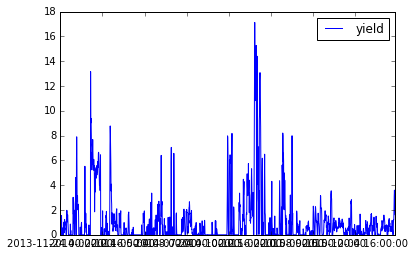

In [243]:
f = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_2_MA_5_D_0/submissions_20160414_175447.csv'
pd.read_csv(f,index_col=0).plot()

In [216]:
model.df.columns

Index([u'feat_yield', u'feat_0', u'feat_1', u'gusts_ms', u'humidity',
       u'leafwet450_min', u'leafwet460_min', u'leafwet_lwscnt', u'percip_mm',
       u'temp', u'type', u'wind_dir', u'wind_ms', u'yield', u'guel_T',
       u'guel_P0', u'guel_P', u'guel_U', u'guel_DD', u'guel_Ff', u'guel_ff10',
       u'guel_WW', u'guel_W'W'', u'guel_c', u'guel_VV', u'guel_Td', u'sidi_T',
       u'sidi_Po', u'sidi_P', u'sidi_Pa', u'sidi_U', u'sidi_Ff', u'sidi_Tn',
       u'sidi_Tx', u'sidi_VV', u'sidi_Td', u'sidi_tR', u'sidi_Tg', u'sidi_sss',
       u'aga_T', u'aga_P0', u'aga_P', u'aga_U', u'aga_DD', u'aga_Ff',
       u'aga_ff10', u'aga_WW', u'aga_W'W'', u'aga_c', u'aga_VV', u'aga_Td',
       u'group', u'yield_pred'],
      dtype='object')

In [209]:
from utils.preprocessing import EWMAMissingValueInputer

In [210]:
a = EWMAMissingValueInputer()

In [211]:
a.fit_transform(model.df[['humidity']])

,humidity
2013-11-23 16:00:00,NaN
2013-11-23 18:00:00,NaN
2013-11-23 20:00:00,NaN
2013-11-23 22:00:00,NaN
2013-11-24 00:00:00,NaN
2013-11-24 02:00:00,NaN
2013-11-24 04:00:00,NaN
2013-11-24 06:00:00,NaN
2013-11-24 08:00:00,NaN
2013-11-24 10:00:00,NaN


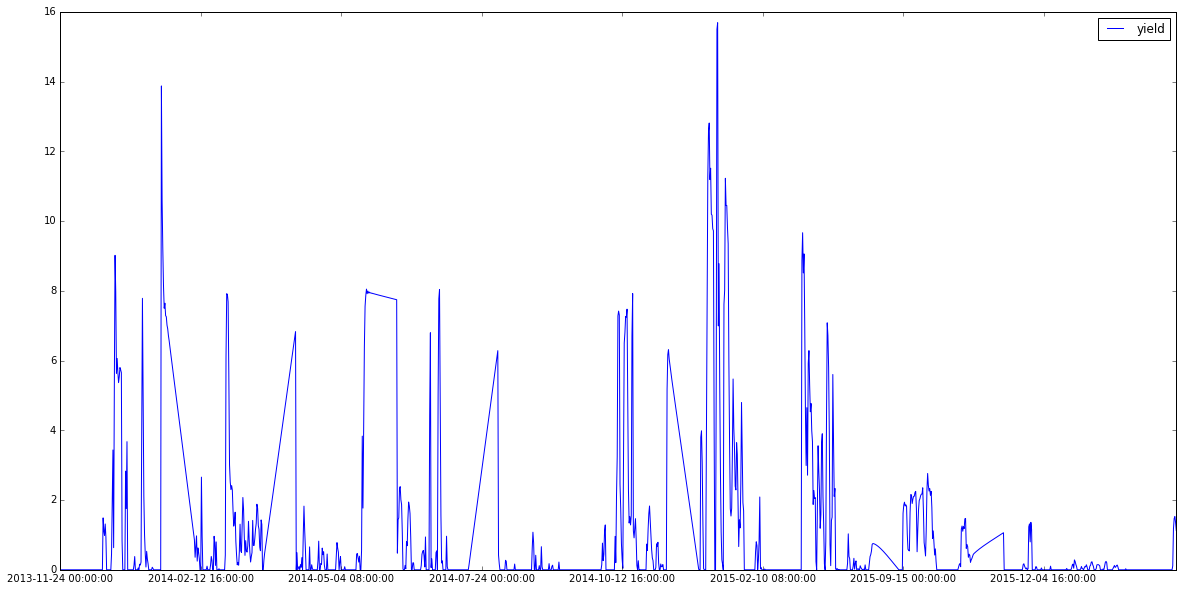

In [149]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
f = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_2_MA_5_D_0/submissions_20160414_153717.csv'
pd.read_csv(f,index_col=0).plot(ax=ax)

In [159]:

train, test = train_test_split(model.df)
train = train[['yield','yield_pred']].dropna()
print np.sqrt(mean_squared_error(train['yield'],train['yield_pred']))
test = test[['yield','yield_pred']].dropna()
print np.sqrt(mean_squared_error(test['yield'],test['yield_pred']))

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation
1.80183969345
1.80183969345


In [160]:
results.head(4)

,train_rmse,test_rmse
leafwet450_min,1.996739,2.557298
leafwet_lwscnt,1.940597,2.575113
leafwet460_min,2.057505,2.748844
humidity,2.150822,2.876913


In [113]:
dftotal

NameError: name 'dftotal' is not defined

In [115]:
score = []
for i,name in tqdm(enumerate(dftotal.columns),total=len(dftotal.columns)):
    ############################
    # pipe_list_brick
    pipe_list= pipe_list_micro
    kwargs_list = {'FeatureSelector__features': [name]}
    pipe_list = {'micro': pipe_list}
    pipe_kwargs = {'micro': kwargs_list}
    pipe_first_test = pipe(pipe_list, pipe_kwargs)
    
    mod = ArimaModel(config,AR=1,MA=5,D=0,pipe=pipe_first_test,
                  pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'))
    mod.train()
    score.append((name,mod.train_rmse,mod.test_rmse))
    

  0%|          | 0/37 [00:00<?, ?it/s]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.182
    aic : 6313.629
    bic : 6359.270
    hqic : 6330.273
test summary:
    rmse : 3.031
    aic : 3232.844
    bic : 3278.485
    hqic : 3249.488
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154303.csv


  3%|▎         | 1/37 [00:11<06:55, 11.54s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.151
    aic : 6316.587
    bic : 6362.228
    hqic : 6333.231
test summary:
    rmse : 2.877
    aic : 3229.740
    bic : 3275.381
    hqic : 3246.385
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154315.csv


  5%|▌         | 2/37 [00:23<06:47, 11.64s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 1.997
    aic : 6150.437
    bic : 6196.078
    hqic : 6167.082
test summary:
    rmse : 2.557
    aic : 3267.855
    bic : 3313.496
    hqic : 3284.499
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154327.csv


  8%|▊         | 3/37 [00:35<06:40, 11.78s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.058
    aic : 6108.834
    bic : 6154.475
    hqic : 6125.478
test summary:
    rmse : 2.749
    aic : 3304.604
    bic : 3350.245
    hqic : 3321.249
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154339.csv


 11%|█         | 4/37 [00:46<06:25, 11.67s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 1.941
    aic : 6056.441
    bic : 6102.082
    hqic : 6073.086
test summary:
    rmse : 2.575
    aic : 3178.436
    bic : 3224.077
    hqic : 3195.081
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154350.csv


 14%|█▎        | 5/37 [00:58<06:08, 11.51s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.405
    aic : 6356.282
    bic : 6401.923
    hqic : 6372.926
test summary:
    rmse : 3.193
    aic : 3258.979
    bic : 3304.620
    hqic : 3275.624
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154401.csv


 16%|█▌        | 6/37 [01:08<05:49, 11.29s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.188
    aic : 6348.611
    bic : 6394.252
    hqic : 6365.255
test summary:
    rmse : 2.996
    aic : 3233.731
    bic : 3279.372
    hqic : 3250.375
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154412.csv


 19%|█▉        | 7/37 [01:19<05:37, 11.25s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.248
    aic : 6349.839
    bic : 6395.480
    hqic : 6366.484
test summary:
    rmse : 3.199
    aic : 3248.688
    bic : 3294.329
    hqic : 3265.332
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154422.csv


 22%|██▏       | 8/37 [01:30<05:20, 11.05s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.185
    aic : 6309.859
    bic : 6355.500
    hqic : 6326.504
test summary:
    rmse : 3.046
    aic : 3232.064
    bic : 3277.705
    hqic : 3248.708
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154434.csv


 24%|██▍       | 9/37 [01:42<05:15, 11.26s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 0.013
    aic : 57315.078
    bic : 57360.719
    hqic : 57331.722
test summary:
    rmse : 0.169
    aic : 78538.843
    bic : 78584.484
    hqic : 78555.487
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154454.csv


 27%|██▋       | 10/37 [02:02<06:15, 13.91s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.235
    aic : 6356.034
    bic : 6401.675
    hqic : 6372.678
test summary:
    rmse : 3.173
    aic : 3237.044
    bic : 3282.685
    hqic : 3253.688
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154505.csv


 30%|██▉       | 11/37 [02:13<05:38, 13.03s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.250
    aic : 6358.762
    bic : 6404.403
    hqic : 6375.407
test summary:
    rmse : 3.190
    aic : 3239.621
    bic : 3285.262
    hqic : 3256.265
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154517.csv


 32%|███▏      | 12/37 [02:24<05:14, 12.58s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.255
    aic : 6360.248
    bic : 6405.889
    hqic : 6376.893
test summary:
    rmse : 3.213
    aic : 3240.505
    bic : 3286.146
    hqic : 3257.149
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154528.csv


 35%|███▌      | 13/37 [02:36<04:52, 12.19s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.227
    aic : 6352.461
    bic : 6398.102
    hqic : 6369.106
test summary:
    rmse : 3.150
    aic : 3232.616
    bic : 3278.257
    hqic : 3249.261
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154539.csv


 38%|███▊      | 14/37 [02:47<04:31, 11.80s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.250
    aic : 6360.922
    bic : 6406.563
    hqic : 6377.566
test summary:
    rmse : 3.216
    aic : 3239.505
    bic : 3285.146
    hqic : 3256.149
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154550.csv


 41%|████      | 15/37 [02:57<04:12, 11.47s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.250
    aic : 6357.671
    bic : 6403.312
    hqic : 6374.316
test summary:
    rmse : 3.226
    aic : 3256.440
    bic : 3302.081
    hqic : 3273.084
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154600.csv


 43%|████▎     | 16/37 [03:08<03:55, 11.23s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.254
    aic : 6359.161
    bic : 6404.802
    hqic : 6375.806
test summary:
    rmse : 3.209
    aic : 3236.919
    bic : 3282.560
    hqic : 3253.564
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154612.csv


 46%|████▌     | 17/37 [03:20<03:47, 11.37s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.242
    aic : 6359.274
    bic : 6404.915
    hqic : 6375.918
test summary:
    rmse : 3.184
    aic : 3238.716
    bic : 3284.357
    hqic : 3255.361
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154625.csv


 49%|████▊     | 18/37 [03:33<03:46, 11.93s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.253
    aic : 6359.748
    bic : 6405.389
    hqic : 6376.393
test summary:
    rmse : 3.203
    aic : 3237.420
    bic : 3283.061
    hqic : 3254.065
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154640.csv


 51%|█████▏    | 19/37 [03:48<03:50, 12.79s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.253
    aic : 6359.851
    bic : 6405.492
    hqic : 6376.495
test summary:
    rmse : 3.205
    aic : 3237.471
    bic : 3283.112
    hqic : 3254.115
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154653.csv


 54%|█████▍    | 20/37 [04:01<03:37, 12.81s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.259
    aic : 6360.546
    bic : 6406.187
    hqic : 6377.191
test summary:
    rmse : 3.228
    aic : 3239.642
    bic : 3285.283
    hqic : 3256.286
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154704.csv


 57%|█████▋    | 21/37 [04:12<03:17, 12.33s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.255
    aic : 6357.359
    bic : 6403.000
    hqic : 6374.004
test summary:
    rmse : 3.206
    aic : 3239.448
    bic : 3285.089
    hqic : 3256.092
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154715.csv


 59%|█████▉    | 22/37 [04:23<02:58, 11.88s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.258
    aic : 6360.134
    bic : 6405.775
    hqic : 6376.778
test summary:
    rmse : 3.229
    aic : 3240.639
    bic : 3286.280
    hqic : 3257.283
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154726.csv


 62%|██████▏   | 23/37 [04:34<02:43, 11.67s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.241
    aic : 6360.164
    bic : 6405.805
    hqic : 6376.808
test summary:
    rmse : 3.180
    aic : 3238.571
    bic : 3284.212
    hqic : 3255.215
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154738.csv


 65%|██████▍   | 24/37 [04:46<02:32, 11.74s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.231
    aic : 6359.039
    bic : 6404.680
    hqic : 6375.684
test summary:
    rmse : 3.143
    aic : 3238.593
    bic : 3284.234
    hqic : 3255.238
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154751.csv


 68%|██████▊   | 25/37 [04:59<02:26, 12.24s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.257
    aic : 6360.335
    bic : 6405.976
    hqic : 6376.979
test summary:
    rmse : 3.225
    aic : 3248.907
    bic : 3294.548
    hqic : 3265.552
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154804.csv


 70%|███████   | 26/37 [05:12<02:18, 12.59s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.260
    aic : 6360.066
    bic : 6405.708
    hqic : 6376.711
test summary:
    rmse : 3.226
    aic : 3239.873
    bic : 3285.514
    hqic : 3256.518
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154817.csv


 73%|███████▎  | 27/37 [05:25<02:05, 12.54s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.244
    aic : 6353.334
    bic : 6398.975
    hqic : 6369.978
test summary:
    rmse : 3.192
    aic : 3247.139
    bic : 3292.780
    hqic : 3263.783
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154829.csv


 76%|███████▌  | 28/37 [05:37<01:52, 12.55s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.256
    aic : 6360.034
    bic : 6405.675
    hqic : 6376.678
test summary:
    rmse : 3.206
    aic : 3242.007
    bic : 3287.648
    hqic : 3258.651
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154844.csv


 78%|███████▊  | 29/37 [05:52<01:45, 13.21s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.258
    aic : 6361.095
    bic : 6406.736
    hqic : 6377.739
test summary:
    rmse : 3.230
    aic : 3239.612
    bic : 3285.253
    hqic : 3256.256
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154856.csv


 81%|████████  | 30/37 [06:04<01:29, 12.74s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.243
    aic : 6355.378
    bic : 6401.019
    hqic : 6372.023
test summary:
    rmse : 3.196
    aic : 3237.912
    bic : 3283.553
    hqic : 3254.556
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154910.csv


 84%|████████▍ | 31/37 [06:18<01:18, 13.03s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.247
    aic : 6358.329
    bic : 6403.970
    hqic : 6374.974
test summary:
    rmse : 3.188
    aic : 3240.565
    bic : 3286.206
    hqic : 3257.209
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154922.csv


 86%|████████▋ | 32/37 [06:29<01:03, 12.69s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.249
    aic : 6359.037
    bic : 6404.678
    hqic : 6375.682
test summary:
    rmse : 3.196
    aic : 3240.272
    bic : 3285.913
    hqic : 3256.916
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154934.csv


 89%|████████▉ | 33/37 [06:42<00:50, 12.56s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.245
    aic : 6353.495
    bic : 6399.136
    hqic : 6370.140
test summary:
    rmse : 3.191
    aic : 3233.401
    bic : 3279.042
    hqic : 3250.045
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154946.csv


 92%|█████████▏| 34/37 [06:54<00:37, 12.38s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.256
    aic : 6357.882
    bic : 6403.523
    hqic : 6374.526
test summary:
    rmse : 3.222
    aic : 3236.279
    bic : 3281.920
    hqic : 3252.923
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_154957.csv


 95%|█████████▍| 35/37 [07:05<00:24, 12.17s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.259
    aic : 6360.124
    bic : 6405.765
    hqic : 6376.769
test summary:
    rmse : 3.196
    aic : 3240.331
    bic : 3285.972
    hqic : 3256.975
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_155010.csv


 97%|█████████▋| 36/37 [07:18<00:12, 12.16s/it]

Loading the prepro pipeline
Order : 
(1, 0, 5)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 2.259
    aic : 6359.823
    bic : 6405.464
    hqic : 6376.467
test summary:
    rmse : 3.223
    aic : 3236.659
    bic : 3282.300
    hqic : 3253.303
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_1/AR_1_MA_5_D_0/submissions_20160414_155021.csv


In [118]:
results = pd.DataFrame(np.array(score)[:,1:].astype('float'),columns = ['train_rmse','test_rmse'],index =np.array(score)[:,0])
results.sort_values('test_rmse',inplace=True)
results = results.drop('yield',axis=0)
results[results.test_rmse<1].index

Index([], dtype='object')

In [119]:
results

,train_rmse,test_rmse
leafwet450_min,1.996739,2.557298
leafwet_lwscnt,1.940597,2.575113
leafwet460_min,2.057505,2.748844
humidity,2.150822,2.876913
temp,2.187553,2.995970
gusts_ms,2.181842,3.031104
wind_ms,2.184618,3.045707
sidi_Tx,2.231388,3.143187
guel_U,2.226880,3.149784
guel_T,2.235121,3.173238


In [92]:
model.fit('group0',train)

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [93]:
mod = model.get_model('group0',train)

In [97]:
model.get_scores('group0',train)

[2.0564553025383887,
 12396.684433140079,
 12497.69822435823,
 12432.456084147303,
 4078]

In [99]:
a = model.merge_fitted_values(train,mod.fittedvalues)

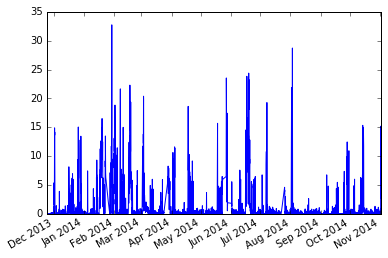

In [103]:
a.yield_pred.plot()

In [86]:
gp = model.dfgroup.get_group('group0')

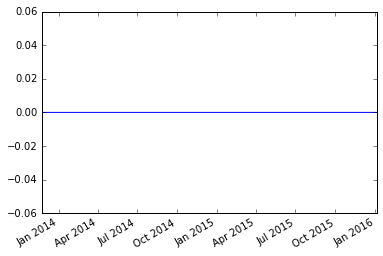

In [91]:
model.df.yield_pred.plot()

In [87]:
train,test= train_test_split_rand_yield(gp)

Le train is composed by 4078 observation
Le test is composed 4078 observation


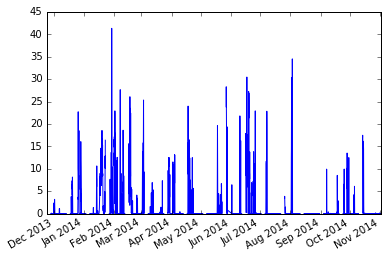

In [89]:
train['yield'].plot()

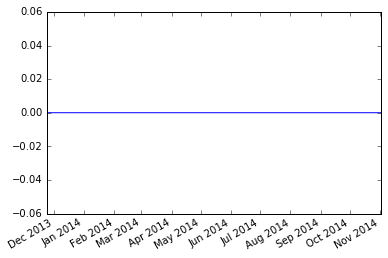

In [88]:
train.yield_pred.plot()

In [641]:
gp = model.dfgroup.get_group('group0')

In [642]:
train, _ = train_test_split_rand_yield(gp)

Le train is composed by 1 group and 4078 observation
Le test is composed by 1 group and 4078 observation


In [649]:
df_model = model.get_model_architecture(train)
df_results = df_model.fit(maxiter=50, disp=0, iprint=0)

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
from utils.data_utils import *

In [71]:
train,test = train_test_split(model.df,seed=13)

AssertionError: 

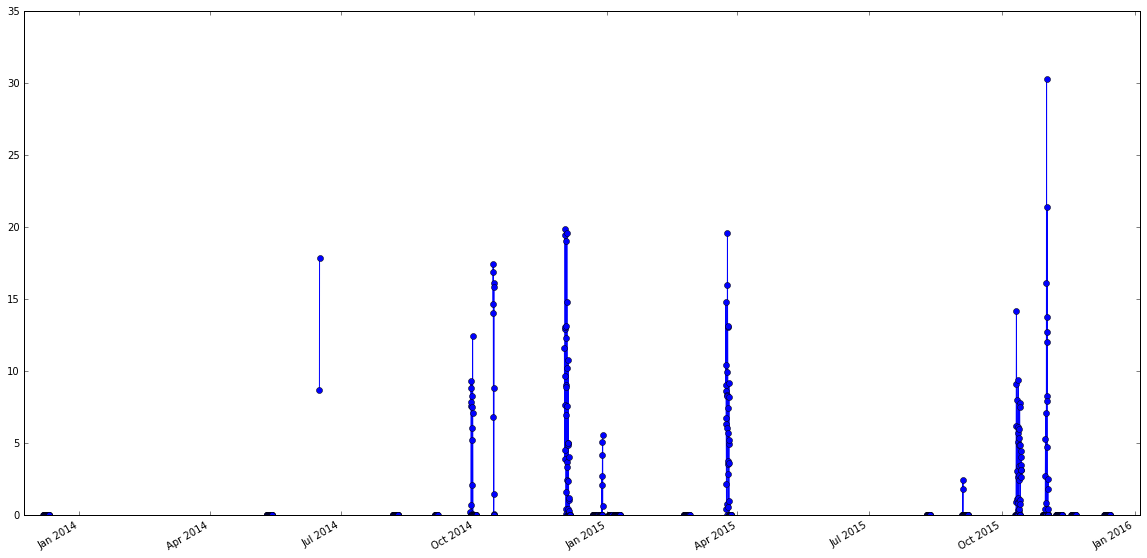

In [65]:
fig = plt.figure(figsize=(20,10))
#train.feat_yield.plot(marker='o')
test.feat_yield.plot(marker='o')

In [46]:
for name,gp in model.dfgroup:
    gp = model.dfgroup.get_group('group0')
    train,test = train_test_split(gp,seed=5

SyntaxError: invalid syntax (<ipython-input-46-9c8087789a89>, line 3)

In [72]:
seed_ok = []
for i in tqdm(range(200)):
    try:
        _,_ =train_test_split(model.df,seed=i)
        seed_ok.append(i)
    except:
        pass

  2%|▏         | 4/200 [00:00<00:05, 35.04it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


  3%|▎         | 6/200 [00:00<00:08, 23.01it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


  6%|▌         | 12/200 [00:00<00:09, 20.56it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 14%|█▎        | 27/200 [00:01<00:06, 28.82it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 44%|████▍     | 88/200 [00:02<00:02, 42.15it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 60%|██████    | 120/200 [00:03<00:01, 40.08it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 64%|██████▍   | 129/200 [00:03<00:02, 34.49it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation
Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 72%|███████▏  | 144/200 [00:04<00:01, 34.62it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


 86%|████████▋ | 173/200 [00:04<00:00, 41.60it/s]

Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


In [16]:
5*3*48

720

In [541]:
gp = model.dfgroup.get_group('group0')

In [524]:
idx = np.arange(len(gp))
idx_train = np.sort(randgen.choice(idx, size=int(len(idx) *0.75), replace=False))

In [534]:
from utils.data_utils import *

In [632]:
3*6*48

864

384
Le train is composed by 1 group and 4078 observation
Le test is composed by 1 group and 4078 observation


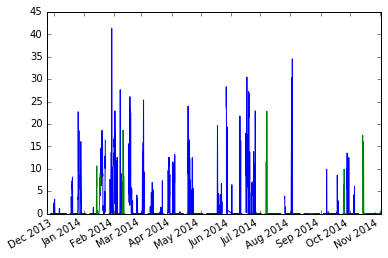

In [636]:
train,test = train_test_split_rand_yield(gp,nb_gaps=8)
train.feat_yield.plot()
test.feat_yield.plot()

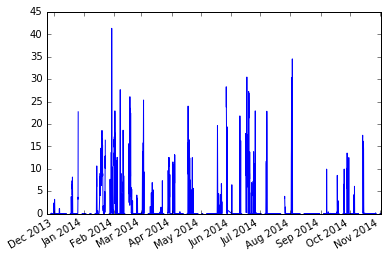

In [618]:
train.feat_yield.plot()
test.feat_yield.plot()

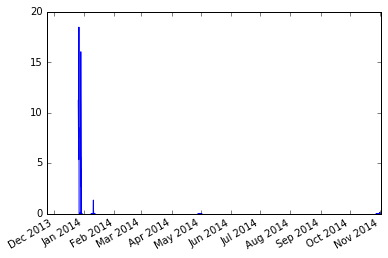

In [619]:
test.feat_yield.plot()

In [611]:
randgen = np.random.RandomState(13)
nb_gaps=10
idx = np.arange(len(gp))
init_idx_test = list(np.sort(randgen.choice(range(len(gp) - 48), size=nb_gaps, replace=False)))
idx_test = reduce(lambda x, y: x + y,map(build_seq, list(init_idx_test)))
mask = np.in1d(idx, idx_test)
idx_train = np.sort(idx[~mask])

train_gp = gp.copy()
train_gp.loc[gp.iloc[idx_test].index, 'feat_yield'] = np.nan
train.append(train_gp)

test_gp = gp.copy()
test_gp.loc[gp.iloc[idx_train].index, 'feat_yield'] = np.nan
test.append(test_gp)


,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2013-11-23 16:00:00,0,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0,0.000000
2013-11-23 18:00:00,0,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 20:00:00,0,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 22:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,2,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 00:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 02:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 04:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 06:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 08:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,3,NaN,NaN,NaN,NaN,10.0 and more,15,group0,0.000000
2013-11-24 10:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,NaN,NaN,NaN,NaN,NaN,Broken clouds (60-90%) 480 m,10.0 and more,NaN,group0,0.000000


In [612]:
len(set([x for x in idx_test if idx_test.count(x) > 1]))

0

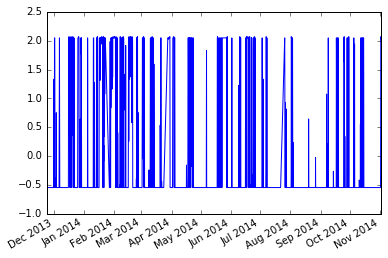

In [613]:
train_gp.feat_0.plot()

In [608]:
idx_test

[925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1143,
 1144,
 1145,
 1146,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1219,
 1220,
 1221,
 1222,
 1223,
 1224,
 1225,
 1226,
 1227,
 1228,
 1229,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237,
 1238,
 1239,
 1240,
 1241,
 1242,
 1243,
 1244,
 1245,
 1246,
 1247,
 1248,
 1249,
 1250,
 1251,
 1252,
 1253,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934

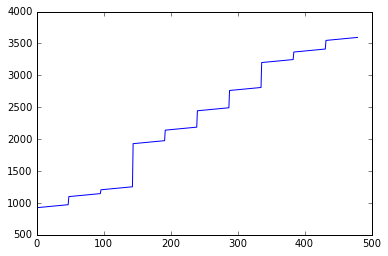

In [607]:
plt.plot(idx_test)

In [604]:
idx_train

array([   0,    1,    2, ..., 4075, 4076, 4077])

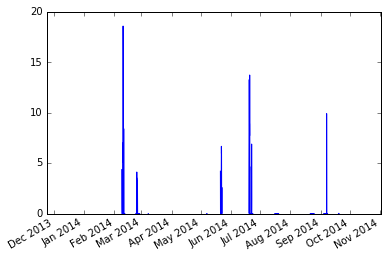

In [605]:
test_gp.feat_yield.plot()

In [574]:
6*48

288

In [569]:
12+12+12+12

48

In [568]:
np.sort(randgen.choice(idx, size=4, replace=False))

array([ 699,  708,  745, 1062])

TypeError: object of type 'AxesSubplot' has no len()

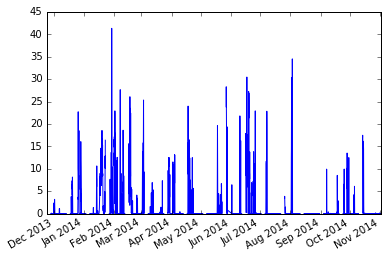

In [567]:
len(gp.feat_yield.plot())

In [562]:
train, test = train_test_split_rand_yield(gp)

Le train is composed by 1 group and 4078 observation
Le test is composed by 1 group and 4078 observation


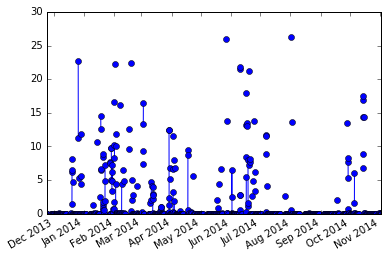

In [564]:
test['feat_yield'].plot(marker='o')

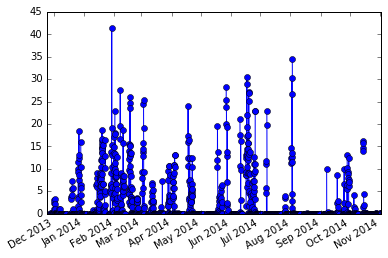

In [565]:
train['feat_yield'].plot(marker='o')


In [551]:
df = dftotal
df = add_group_column_to_data(df)
n = df.groupby('group').ngroups

randgen = np.random.RandomState(1234)
train = []
test = []
for name, gp in df.groupby('group'):
    idx = np.arange(len(gp))
    idx_train = np.sort(randgen.choice(
            idx, size=int(len(idx) * split), replace=False))
    mask = np.in1d(idx, idx_train)
    idx_test = np.sort(idx[~mask])
        
    train_gp = gp.copy()
    train_gp.loc[gp.iloc[idx_train].index, 'feat_yield'] = np.nan
    train.append(train_gp)

    test_gp = gp.copy()
    test_gp.loc[gp.iloc[idx_test].index, 'feat_yield'] = np.nan
    test.append(test_gp)

train = reduce(lambda a, b: a.append(b), train)
test = reduce(lambda a, b: a.append(b), test)
if verbose > 0:
    print('Le train is composed by %d group and %d observation' %
              (train.groupby('group').ngroups, len(train)))
    print('Le test is composed by %d group and %d observation' %
              (test.groupby('group').ngroups, len(test)))


Le train is composed by 3 group and 7377 observation
Le test is composed by 3 group and 7377 observation


In [558]:
gp = model.dfgroup.get_group('group0')
idx = np.arange(len(gp))
idx_train = np.sort(randgen.choice(
            idx, size=int(len(idx) * split), replace=False))
mask = np.in1d(idx, idx_train)
idx_test = np.sort(idx[~mask])
train_gp = gp.copy()
train_gp.loc[gp.iloc[idx_train].index, 'feat_yield'] = np.nan

In [561]:
train_gp.feat_yield

2013-11-23 16:00:00     0
2013-11-23 18:00:00   NaN
2013-11-23 20:00:00   NaN
2013-11-23 22:00:00   NaN
2013-11-24 00:00:00   NaN
2013-11-24 02:00:00   NaN
2013-11-24 04:00:00   NaN
2013-11-24 06:00:00   NaN
2013-11-24 08:00:00   NaN
2013-11-24 10:00:00   NaN
2013-11-24 12:00:00   NaN
2013-11-24 14:00:00   NaN
2013-11-24 16:00:00   NaN
2013-11-24 18:00:00   NaN
2013-11-24 20:00:00   NaN
2013-11-24 22:00:00   NaN
2013-11-25 00:00:00   NaN
2013-11-25 02:00:00   NaN
2013-11-25 04:00:00   NaN
2013-11-25 06:00:00   NaN
2013-11-25 08:00:00   NaN
2013-11-25 10:00:00   NaN
2013-11-25 12:00:00   NaN
2013-11-25 14:00:00   NaN
2013-11-25 16:00:00   NaN
2013-11-25 18:00:00   NaN
2013-11-25 20:00:00   NaN
2013-11-25 22:00:00   NaN
2013-11-26 00:00:00   NaN
2013-11-26 02:00:00   NaN
                       ..
2014-10-31 00:00:00   NaN
2014-10-31 02:00:00     0
2014-10-31 04:00:00   NaN
2014-10-31 06:00:00     0
2014-10-31 08:00:00   NaN
2014-10-31 10:00:00   NaN
2014-10-31 12:00:00   NaN
2014-10-31 1

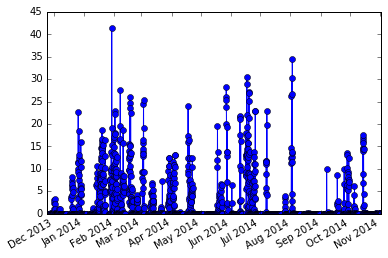

In [547]:
gp.feat_yield.plot(marker='o')

In [525]:
idx_train

array([   0,    1,    2, ..., 4074, 4076, 4077])

In [530]:
gp.loc[gp.iloc[idx_train].index,'feat_yield'] = np.nan

In [533]:
gp.copy()

,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2013-11-23 16:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0,0.000000
2013-11-23 18:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 20:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 22:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,2,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 00:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 02:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 04:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 06:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 08:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,3,NaN,NaN,NaN,NaN,10.0 and more,15,group0,0.000000
2013-11-24 10:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,NaN,NaN,NaN,NaN,NaN,Broken clouds (60-90%) 480 m,10.0 and more,NaN,group0,0.000000


In [523]:
gp['feat_yield']

2013-11-23 16:00:00    0.000000
2013-11-23 18:00:00    0.000000
2013-11-23 20:00:00    0.000000
2013-11-23 22:00:00    0.000000
2013-11-24 00:00:00         NaN
2013-11-24 02:00:00         NaN
2013-11-24 04:00:00         NaN
2013-11-24 06:00:00         NaN
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00         NaN
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00         NaN
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00         NaN
2013-11-24 20:00:00         NaN
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00         NaN
2013-11-25 04:00:00         NaN
2013-11-25 06:00:00         NaN
2013-11-25 08:00:00         NaN
2013-11-25 10:00:00         NaN
2013-11-25 12:00:00         NaN
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00         NaN
2013-11-25 18:00:00         NaN
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00         NaN
2013-11-26 00:00:00         NaN
2013-11-26 02:00:00         NaN
                         ...   
2014-10-

In [520]:
test

,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2013-11-23 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-23 22:00:00,0.000000,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,2,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 08:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,3,NaN,NaN,NaN,NaN,10.0 and more,15,group0,0.000000
2013-11-24 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [519]:
model.dfgroup.get_group('group0')

,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2013-11-23 16:00:00,0.000000,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0,0.000000
2013-11-23 18:00:00,0.000000,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 20:00:00,0.000000,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the west-southwest,4,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-23 22:00:00,0.000000,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,2,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 00:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 02:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 04:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,NaN,10.0 and more,13,group0,0.000000
2013-11-24 06:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,"Calm, no wind",0,NaN,NaN,NaN,Scattered clouds (40-50%) 480 m,10.0 and more,13,group0,0.000000
2013-11-24 08:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,Wind blowing from the south-west,3,NaN,NaN,NaN,NaN,10.0 and more,15,group0,0.000000
2013-11-24 10:00:00,NaN,-0.549137,-0.393277,-0.074508,-1.015748,-0.001650,0.115107,-0.713014,-0.109310,-0.477720,...,NaN,NaN,NaN,NaN,NaN,Broken clouds (60-90%) 480 m,10.0 and more,NaN,group0,0.000000


In [497]:
model.get_scores(name, train)

[4.3351215719991885,
 39600.052774238371,
 39701.253793336473,
 39635.869436213536,
 4126]

In [499]:
mod = model.get_model('group0',train)
df = model.merge_fitted_values(train,mod.fittedvalues)

In [511]:
train.feat_2

2013-11-23 16:00:00   -0.074508
2013-11-23 18:00:00   -0.074508
2013-11-23 20:00:00   -0.074508
2013-11-23 22:00:00         NaN
2013-11-24 00:00:00   -0.074508
2013-11-24 02:00:00   -0.074508
2013-11-24 04:00:00   -0.074508
2013-11-24 06:00:00   -0.074508
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00   -0.074508
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00   -0.074508
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00   -0.074508
2013-11-24 20:00:00   -0.074508
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00   -0.074508
2013-11-25 04:00:00   -0.074508
2013-11-25 06:00:00   -0.074508
2013-11-25 08:00:00   -0.074508
2013-11-25 10:00:00   -0.074508
2013-11-25 12:00:00   -0.074508
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00   -0.074508
2013-11-25 18:00:00   -0.074508
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00   -0.074508
2013-11-26 00:00:00   -0.074508
2013-11-26 02:00:00   -0.074508
                         ...   
2014-10-

In [507]:
mod.fittedvalues

2013-11-23 16:00:00    -1.801507
2013-11-23 18:00:00    -0.366422
2013-11-23 20:00:00    -0.399830
2013-11-23 22:00:00          NaN
2013-11-24 00:00:00    -0.655861
2013-11-24 02:00:00    -0.820132
2013-11-24 04:00:00    -0.903109
2013-11-24 06:00:00    -0.943460
2013-11-24 08:00:00          NaN
2013-11-24 10:00:00    -0.957455
2013-11-24 12:00:00          NaN
2013-11-24 14:00:00    -0.971221
2013-11-24 16:00:00          NaN
2013-11-24 18:00:00    -0.984763
2013-11-24 20:00:00    -0.991451
2013-11-24 22:00:00          NaN
2013-11-25 00:00:00          NaN
2013-11-25 02:00:00    -1.011188
2013-11-25 04:00:00    -1.017660
2013-11-25 06:00:00    -1.024079
2013-11-25 08:00:00    -1.030445
2013-11-25 10:00:00    -1.036759
2013-11-25 12:00:00    -1.043021
2013-11-25 14:00:00          NaN
2013-11-25 16:00:00    -1.055392
2013-11-25 18:00:00    -1.061501
2013-11-25 20:00:00          NaN
2013-11-25 22:00:00    -1.073571
2013-11-26 00:00:00    -1.079532
2013-11-26 02:00:00    -1.085444
          

In [506]:
train['feat_yield']

2013-11-23 16:00:00    0.000000
2013-11-23 18:00:00    0.000000
2013-11-23 20:00:00    0.000000
2013-11-23 22:00:00         NaN
2013-11-24 00:00:00         NaN
2013-11-24 02:00:00         NaN
2013-11-24 04:00:00         NaN
2013-11-24 06:00:00         NaN
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00         NaN
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00         NaN
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00         NaN
2013-11-24 20:00:00         NaN
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00         NaN
2013-11-25 04:00:00         NaN
2013-11-25 06:00:00         NaN
2013-11-25 08:00:00         NaN
2013-11-25 10:00:00         NaN
2013-11-25 12:00:00         NaN
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00         NaN
2013-11-25 18:00:00         NaN
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00         NaN
2013-11-26 00:00:00         NaN
2013-11-26 02:00:00         NaN
                         ...   
2014-10-

In [505]:
mod.fittedvalues

2013-11-23 16:00:00    -1.801507
2013-11-23 18:00:00    -0.366422
2013-11-23 20:00:00    -0.399830
2013-11-23 22:00:00          NaN
2013-11-24 00:00:00    -0.655861
2013-11-24 02:00:00    -0.820132
2013-11-24 04:00:00    -0.903109
2013-11-24 06:00:00    -0.943460
2013-11-24 08:00:00          NaN
2013-11-24 10:00:00    -0.957455
2013-11-24 12:00:00          NaN
2013-11-24 14:00:00    -0.971221
2013-11-24 16:00:00          NaN
2013-11-24 18:00:00    -0.984763
2013-11-24 20:00:00    -0.991451
2013-11-24 22:00:00          NaN
2013-11-25 00:00:00          NaN
2013-11-25 02:00:00    -1.011188
2013-11-25 04:00:00    -1.017660
2013-11-25 06:00:00    -1.024079
2013-11-25 08:00:00    -1.030445
2013-11-25 10:00:00    -1.036759
2013-11-25 12:00:00    -1.043021
2013-11-25 14:00:00          NaN
2013-11-25 16:00:00    -1.055392
2013-11-25 18:00:00    -1.061501
2013-11-25 20:00:00          NaN
2013-11-25 22:00:00    -1.073571
2013-11-26 00:00:00    -1.079532
2013-11-26 02:00:00    -1.085444
          

In [502]:
df.yield_pred

2013-11-23 16:00:00     0.000000
2013-11-23 18:00:00     0.000000
2013-11-23 20:00:00     0.000000
2013-11-23 22:00:00          NaN
2013-11-24 00:00:00     0.000000
2013-11-24 02:00:00     0.000000
2013-11-24 04:00:00     0.000000
2013-11-24 06:00:00     0.000000
2013-11-24 08:00:00          NaN
2013-11-24 10:00:00     0.000000
2013-11-24 12:00:00          NaN
2013-11-24 14:00:00     0.000000
2013-11-24 16:00:00          NaN
2013-11-24 18:00:00     0.000000
2013-11-24 20:00:00     0.000000
2013-11-24 22:00:00          NaN
2013-11-25 00:00:00          NaN
2013-11-25 02:00:00     0.000000
2013-11-25 04:00:00     0.000000
2013-11-25 06:00:00     0.000000
2013-11-25 08:00:00     0.000000
2013-11-25 10:00:00     0.000000
2013-11-25 12:00:00     0.000000
2013-11-25 14:00:00          NaN
2013-11-25 16:00:00     0.000000
2013-11-25 18:00:00     0.000000
2013-11-25 20:00:00          NaN
2013-11-25 22:00:00     0.000000
2013-11-26 00:00:00     0.000000
2013-11-26 02:00:00     0.000000
          

In [501]:
df['yield']

2013-11-23 16:00:00    0.000000
2013-11-23 18:00:00    0.000000
2013-11-23 20:00:00    0.000000
2013-11-23 22:00:00         NaN
2013-11-24 00:00:00         NaN
2013-11-24 02:00:00         NaN
2013-11-24 04:00:00         NaN
2013-11-24 06:00:00         NaN
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00         NaN
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00         NaN
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00         NaN
2013-11-24 20:00:00         NaN
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00         NaN
2013-11-25 04:00:00         NaN
2013-11-25 06:00:00         NaN
2013-11-25 08:00:00         NaN
2013-11-25 10:00:00         NaN
2013-11-25 12:00:00         NaN
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00         NaN
2013-11-25 18:00:00         NaN
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00         NaN
2013-11-26 00:00:00         NaN
2013-11-26 02:00:00         NaN
                         ...   
2014-10-

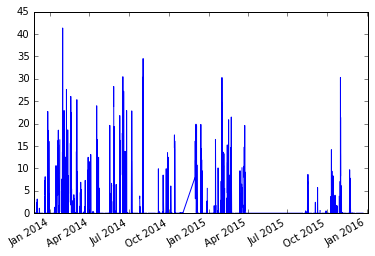

In [495]:
model.df['yield'].plot()

In [477]:
df=dftotal
verbose=1
split = 0.75
df = add_group_column_to_data(df)
n = df.groupby('group').ngroups

randgen = np.random.RandomState(1234)
train = []
test = []
for name, gp in df.groupby('group'):
    dates = pd.date_range(gp.index.min(), gp.index.max(),freq='2H')
    idx = np.arange(len(gp))
    idx_train = np.sort(randgen.choice(
        idx, size=int(len(idx) * split), replace=False))
    mask = np.in1d(idx, idx_train)
    idx_test = np.sort(idx[~mask])
    train_gp = gp.iloc[idx_train]
    train.append(train_gp.reindex(dates))

    test_gp = gp.iloc[idx_test]
    test.append(test_gp.reindex(dates))

train = reduce(lambda a, b: a.append(b), train)
test = reduce(lambda a, b: a.append(b), test)
if verbose > 0:
    print('Le train is composed by %d group and %d observation' %
              (train.groupby('group').ngroups, len(train)))
    print('Le test is composed by %d group and %d observation' %
              (test.groupby('group').ngroups, len(test)))


Le train is composed by 3 group and 7425 observation
Le test is composed by 3 group and 7425 observation


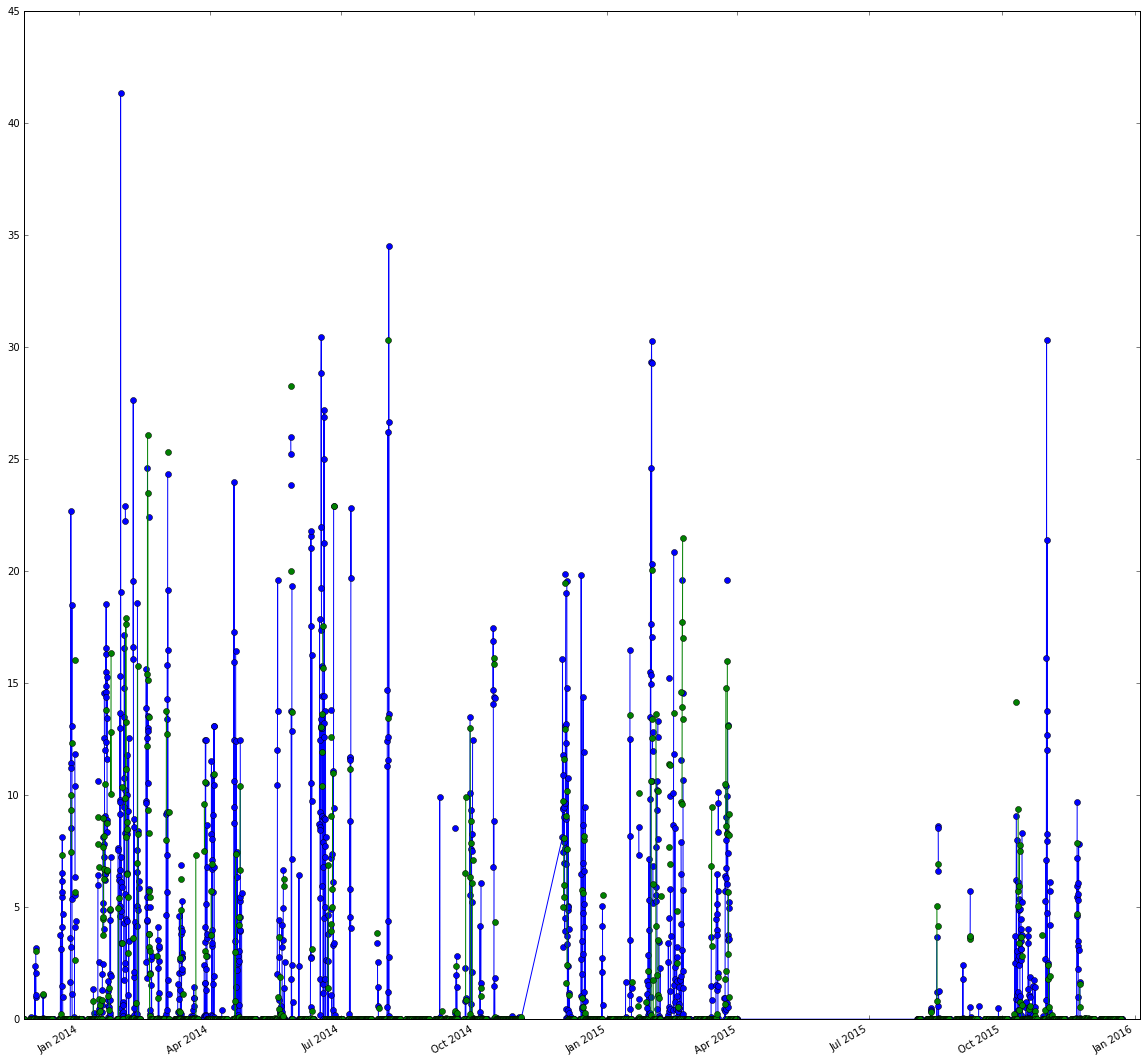

In [483]:
fig = plt.figure(figsize=(20,20))
train['yield'].plot(marker='o')
test['yield'].plot(marker='o')

In [470]:
train_gp.head()

,gusts_ms,humidity,leafwet450_min,leafwet460_min,leafwet_lwscnt,percip_mm,temp,wind_dir,wind_ms,yield,...,sidi_Tg,sidi_sss,aga_T,aga_P0,aga_P,aga_U,aga_Ff,aga_ff10,aga_Td,group
2015-08-03 14:00:00,2.811135,NaN,NaN,NaN,NaN,NaN,NaN,251.526316,2.318789,0,...,16,16,27,754.8,761.2,54,6,NaN,17,group3
2015-08-03 16:00:00,3.323554,0.698318,0,0,439.176471,0,19.829412,290.000000,2.766136,0,...,16,16,26,754.8,761.2,54,6,NaN,16,group3
2015-08-03 20:00:00,2.740989,0.715413,0,0,442.958333,0,17.625000,176.875000,2.313495,0,...,16,16,22,754.7,761.2,69,4,NaN,16,group3
2015-08-03 22:00:00,3.491199,0.601280,0,0,442.666667,0,19.958333,243.125000,3.122381,0,...,16,16,21,755.5,762.0,78,3,NaN,17,group3
2015-08-04 02:00:00,2.891869,0.232061,0,0,438.333333,0,25.270833,78.291667,2.531433,0,...,16,16,19,753.9,760.5,83,0,NaN,16,group3


NonGuiException: 

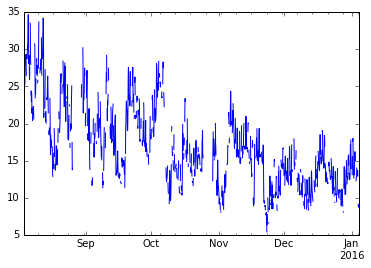

In [476]:
d = train_gp.reindex(dates)
d.temp.plot()

NonGuiException: 

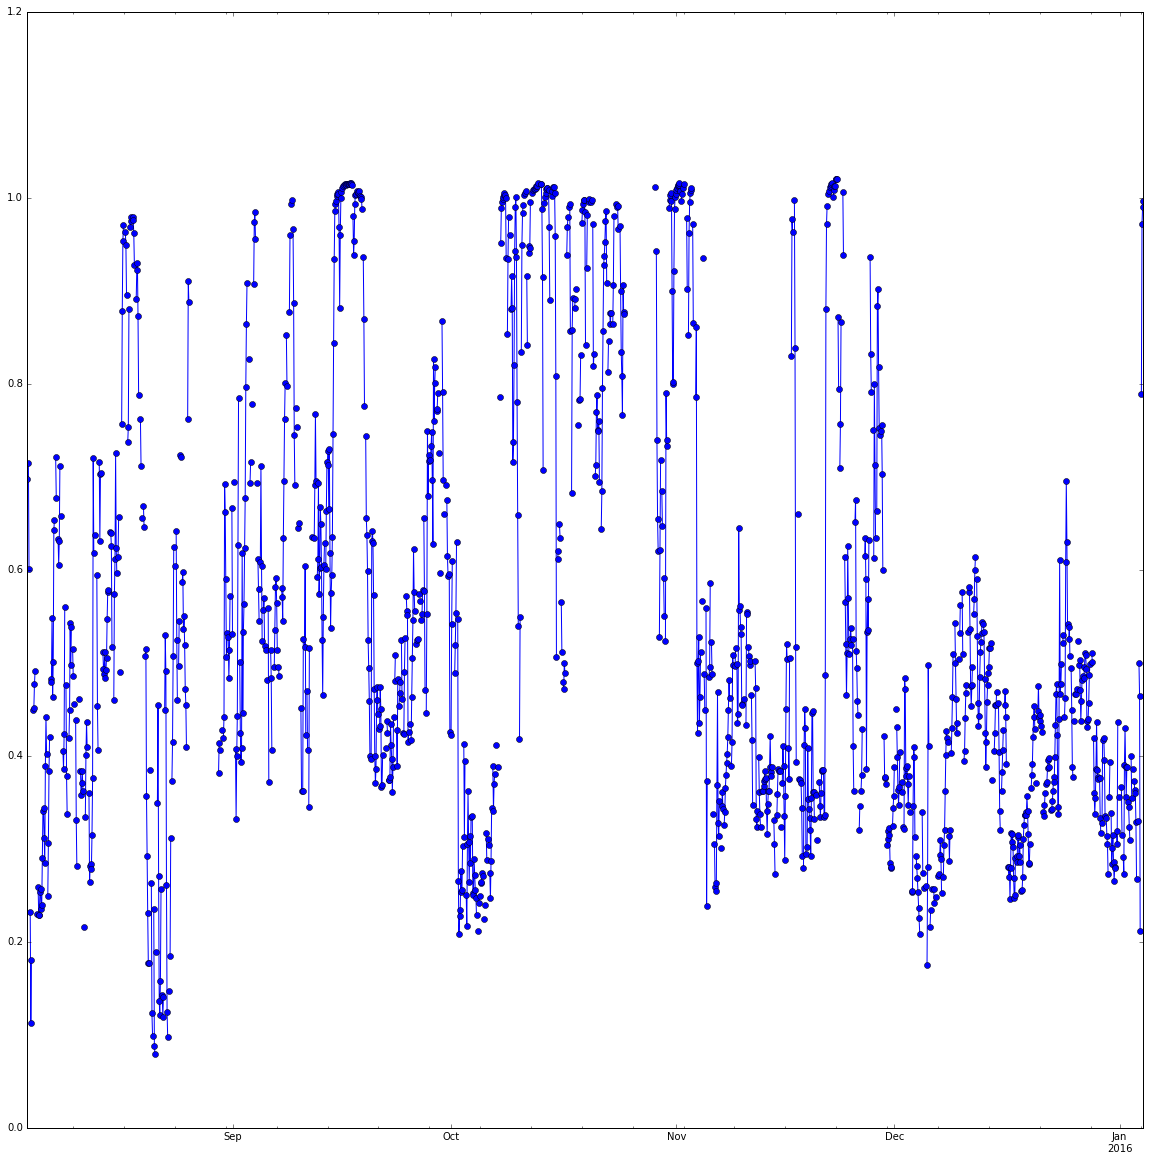

In [467]:
fig = plt.figure(figsize=(20,20))
train_gp.reindex(dates).humidity.plot(marker='o')

In [460]:
len(train_gp)

1385

In [461]:
len(test_gp)

462

In [458]:
len(idx_train)

1385

In [459]:
len(idx_test)

462

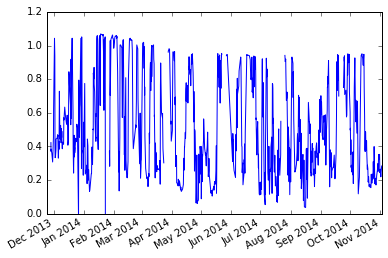

In [455]:
test[test.group=='group0'].humidity.plot()
#train[train.group=='group0'].humidity.plot()

In [439]:
pd.date_range?

In [437]:
len(idx_train)

1385

In [433]:
len(dftotal)

7392

In [417]:
r.choice(a,2)

array([-1.99436319,  0.64465144])

In [414]:
np.random.seed(20)

In [260]:
pd.DataFrame(x).diff()

,0,1,2
0,NaN,NaN,NaN
1,0,0,0
2,0,0,0


In [ ]:
x = np.zeros()

In [248]:
pipe_list_micro

['FeatureSelector',
 'MissingValueInputer',
 'FillRemainingNaN',
 'MyStandardScaler']

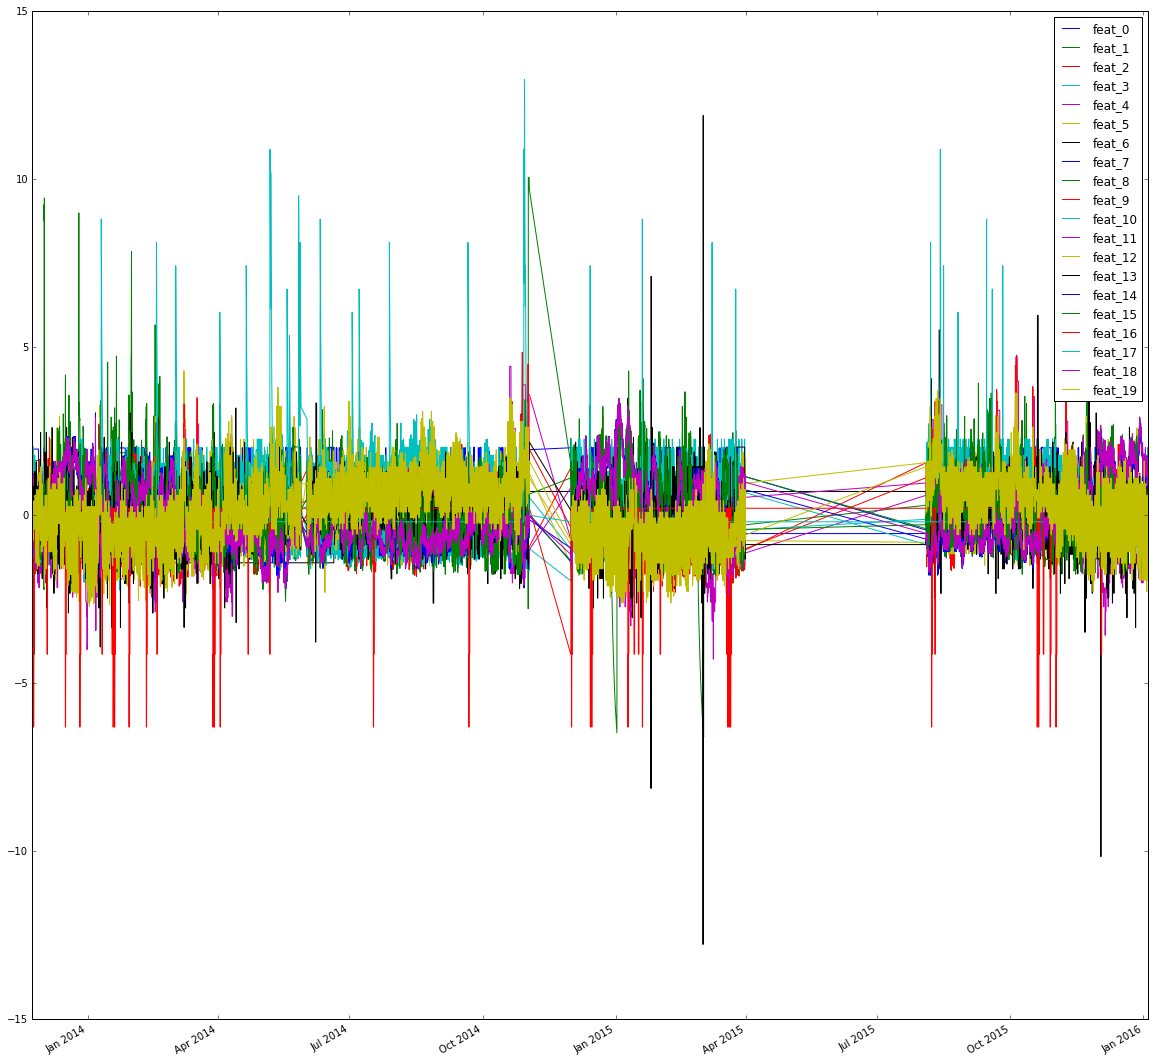

In [163]:
fig = plt.figure(figsize =(20,20))
ax = plt.subplot(111)
mod.df[mod.regressors].plot(ax=ax)

In [208]:
    def fit_best_ARIMA( x):
        robj.globalenv['x'] = x
        robj.r('y<-x')
        robj.r('fit <- auto.arima(x)')
        robj.r('arma <- fit$arma')
        arma = rpyn.ri2py(robj.r['arma'])
        AR,MA,S_AR,S_MA,P,D,S_D = map(int,arma)
        print AR,MA,S_AR,S_MA,P,D,S_D
        m = sm.tsa.SARIMAX(endog=x,order=(AR,D,MA),seasonal_order=(S_AR,S_D,S_MA,P))
        res = m.fit(disp=0, iprint=0)
        
    #    m = sm.tsa.SARIMAX(endog=x,order=(AR,D,MA),seasonal_order=(S_AR,S_D,S_MA,P),
    #                          enforce_stationarity=False, enforce_invertibility=False)
    #    res = m.fit(disp=0,iprint=0)
    
        robj.r('kr <- KalmanRun(x, fit$model)')
        robj.r('id.na <- which(is.na(x))')
        robj.r('for (i in id.na) y[i] <- fit$model$Z %*% kr$states[i,]')
        return rpyn.ri2py(robj.r['y']),res.fittedvalues

In [232]:
m.seasonal_order

(0, 0, 0, 0)

In [210]:
yr,yp = fit_best_ARIMA(dftotal.humidity)

3 0 0 0 1 0 0


In [136]:
y = a.fit_transform(dftotal.humidity)

(4078, 1)
(1452, 1)
(1847, 1)


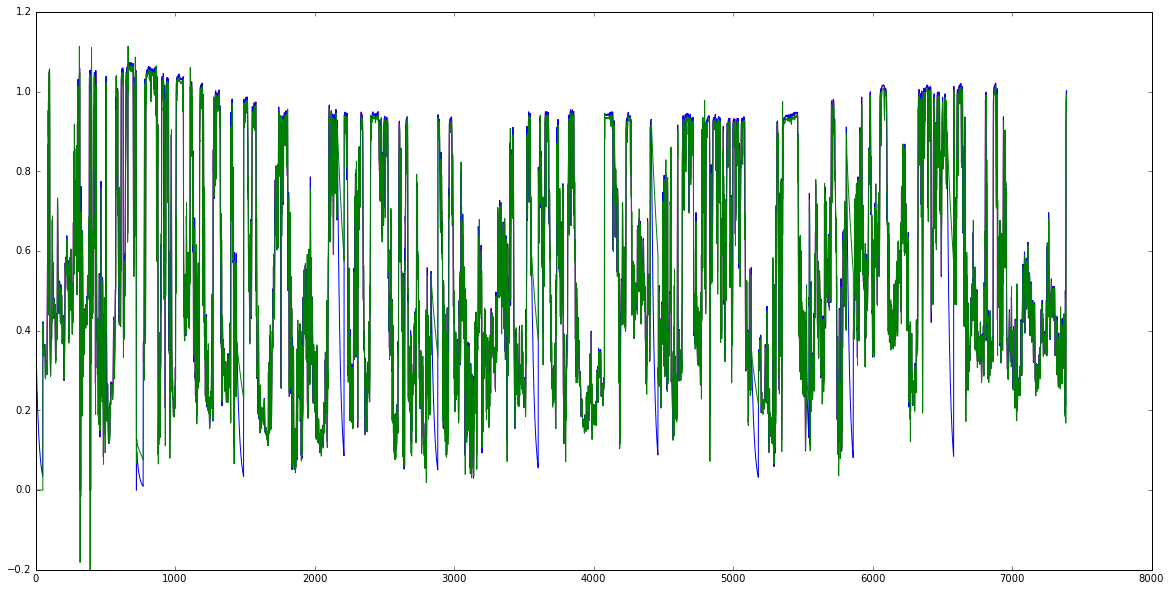

In [215]:
fig = plt.figure(figsize = (20,10))
plt.plot(dftotal.humidity.values,color='r')
plt.plot(yr)
plt.plot(yp.values,color='g')

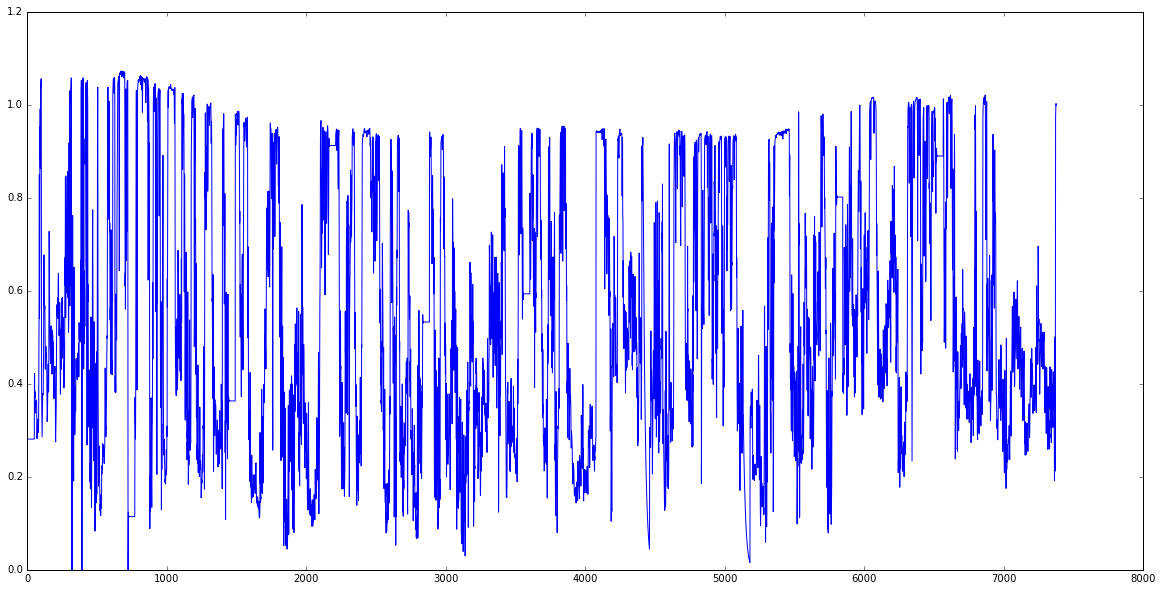

In [142]:
fig = plt.figure(figsize = (20,10))
plt.plot(y)

In [222]:
res.fittedvalues.values

array([ 0.        ,  0.        ,  0.        , ...,  0.98160816,
        0.98792978,  0.9932868 ])